In [15]:
# HEAVILY DRAWN FROM: 
# https://www.tensorflow.org/tutorials/load_data/pandas_dataframe
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
BATCH_SIZE = 2

In [231]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU:0')))

Num GPUs Available:  0


In [232]:
training_path = os.path.join("./", "final_results/", "trainment.csv")
test_set = pd.read_csv("./final_results/test.csv")
df = pd.read_csv(training_path)
df = pd.concat([test_set, df])
df = df.dropna(axis=1)

In [233]:
target = df.pop('target')

In [234]:
numeric_feature_names = [
    'polarity_title', 'subjectivity_title',
    'polarity_description', 'subjectivity_description', 
]
numeric_features = df[numeric_feature_names]
numeric_features.head()

,polarity_title,subjectivity_title,polarity_description,subjectivity_description
0,-0.10,0.200000,-0.10,0.200000
1,-0.10,0.200000,-0.10,0.200000
2,-0.05,0.150000,-0.05,0.150000
3,0.10,0.633333,0.10,0.633333
4,-0.25,0.250000,-0.25,0.250000


In [235]:
tf.convert_to_tensor(numeric_features)

<tf.Tensor: shape=(859, 4), dtype=float64, numpy=
array([[-0.1       ,  0.2       , -0.1       ,  0.2       ],
       [-0.1       ,  0.2       , -0.1       ,  0.2       ],
       [-0.05      ,  0.15      , -0.05      ,  0.15      ],
       ...,
       [ 0.09444444,  0.15555556,  0.17327911,  0.4394066 ],
       [ 0.        ,  0.        ,  0.30833333,  0.55833333],
       [ 0.33214286,  0.70357143,  0.09209201,  0.3414066 ]])>

In [236]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(numeric_features)

In [237]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

model = get_basic_model()
model.fit(numeric_features, target, epochs=15, batch_size=BATCH_SIZE)

Epoch 1/15
430/430 [==============================] - 4s 7ms/step - loss: 0.6760 - accuracy: 0.6112
Epoch 2/15
430/430 [==============================] - 4s 9ms/step - loss: 0.6616 - accuracy: 0.6135
Epoch 3/15
430/430 [==============================] - 3s 7ms/step - loss: 0.6584 - accuracy: 0.6135
Epoch 4/15
430/430 [==============================] - 2s 6ms/step - loss: 0.6560 - accuracy: 0.6135
Epoch 5/15
430/430 [==============================] - 4s 9ms/step - loss: 0.6535 - accuracy: 0.6135
Epoch 6/15
430/430 [==============================] - 3s 7ms/step - loss: 0.6514 - accuracy: 0.6135
Epoch 7/15
430/430 [==============================] - 3s 7ms/step - loss: 0.6514 - accuracy: 0.6170
Epoch 8/15
430/430 [==============================] - 3s 7ms/step - loss: 0.6498 - accuracy: 0.6158
Epoch 9/15
430/430 [==============================] - 2s 5ms/step - loss: 0.6492 - accuracy: 0.6193
Epoch 10/15
430/430 [==============================] - 3s 8ms/step - loss: 0.6478 - accuracy: 0.6193

In [3]:
model = tf.keras.models.load_model('saved_model/my_model')
model.summary()

2023-05-23 10:14:46.200322: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_13 (Normaliza  (None, 4)                9         
 tion)                                                           
                                                                 
 dense_39 (Dense)            (None, 10)                50        
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 dense_41 (Dense)            (None, 1)                 11        
                                                                 
Total params: 180
Trainable params: 171
Non-trainable params: 9
_________________________________________________________________


In [4]:
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [5]:
test_set = pd.read_csv("./final_results/test.csv")

In [6]:
numeric_feature_names = [
    'polarity_title', 'subjectivity_title',
    'polarity_description', 'subjectivity_description', 
]
numeric_features = test_set[numeric_feature_names]
tf.convert_to_tensor(numeric_features)
target = test_set.pop('target')
test_loss, test_acc = model.evaluate(x = numeric_features, y = target,verbose=2)
print('\nTest accuracy:', test_acc)

13/13 - 0s - loss: 0.6484 - accuracy: 0.6218 - 232ms/epoch - 18ms/step

Test accuracy: 0.6218274235725403


In [10]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(numeric_features)

13/13 [==============================] - 0s 8ms/step


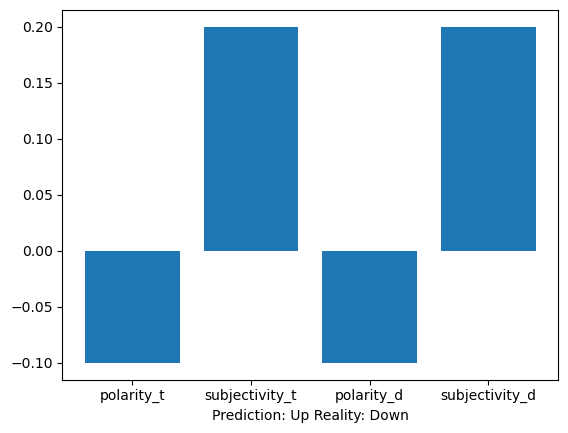

In [40]:
class_names = ['Down', 'Up']
def plot_image(i, predictions_array, true_label, news):
  true_label, news = true_label[i], news.iloc[i]
  plt.grid(False)

  bars = news.to_list()[2:6]
  plt.bar(['polarity_t', 'subjectivity_t',      
           'polarity_d', 'subjectivity_d'], 
            bars,
            )

  predicted_label =predictions_array[0]

  plt.xlabel("Prediction: {} Reality: {}".format(
    class_names[int(predicted_label)],
    class_names[target[i]]))

plot_image(0, predictions[0], class_names, test_set)